In [1]:
import pandas as pd
import re
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv("../Transformación de Datos/Datasets/transactions.csv")
df

,transaction_id,customer_id,product_id,store_id,timestamp,ts_str,ts_tz,quantity,amount,amount_str,discount_pct,discount_str,payment_method,status,device,channel,hi_value_flag
0,1,258,35,2,2025-05-11 15:46:46,2025-05-11 15:46:46,2025-05-11T15:46:46-05:00,4,770.88,$770.88,5,5%,wallet,completed,ios,mobile,1
1,2,208,62,16,2024-01-20 10:14:03,2024/01/20 10:14,2024-01-20T10:14:03-05:00,4,954.78,$954.78,10,10%,transfer,pending,web,desktop,1
2,3,115,5,20,2024-07-09 05:06:54,09/07/2024 05:06,2024-07-09T05:06:54-05:00,4,711.32,$711.32,10,10%,card,completed,android,mobile,1
3,4,288,33,16,2024-04-18 09:10:31,2024-04-18 09:10:31,2024-04-18T09:10:31-05:00,4,2887.96,"$2,887.96",10,10%,card,completed,web,desktop,1
4,5,66,2,9,2025-06-09 14:35:33,2025-06-09T14:35:33,2025-06-09T14:35:33-05:00,1,2.82,$2.82,0,0%,card,completed,ios,mobile,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,136,37,13,2025-03-05 13:22:13,05-Mar-2025 13:22:13,2025-03-05T13:22:13-05:00,1,163.03,$163.03,0,0%,transfer,completed,android,mobile,0
1496,1497,17,56,18,2024-12-01 10:13:45,01/12/2024 10:13,2024-12-01T10:13:45-05:00,2,390.84,$390.84,5,5%,card,completed,android,mobile,0
1497,1498,88,75,9,2025-06-11 22:25:49,2025-06-11T22:25:49,2025-06-11T22:25:49-05:00,1,379.73,$379.73,5,5%,card,completed,android,mobile,0
1498,1499,209,52,20,2025-05-28 03:49:01,28-May-2025 03:49:01,2025-05-28T03:49:01-05:00,1,226.08,$226.08,0,0%,cash,completed,android,mobile,0


## Marca de Tiempo Limpia

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["timestamp"]

0      2025-05-11 15:46:46
1      2024-01-20 10:14:03
2      2024-07-09 05:06:54
3      2024-04-18 09:10:31
4      2025-06-09 14:35:33
               ...        
1495   2025-03-05 13:22:13
1496   2024-12-01 10:13:45
1497   2025-06-11 22:25:49
1498   2025-05-28 03:49:01
1499   2024-03-07 13:27:14
Name: timestamp, Length: 1500, dtype: datetime64[ns]

In [7]:
df["timestamp"].dt.year

0       2025
1       2024
2       2024
3       2024
4       2025
        ... 
1495    2025
1496    2024
1497    2025
1498    2025
1499    2024
Name: timestamp, Length: 1500, dtype: int32

<Axes: xlabel='timestamp'>

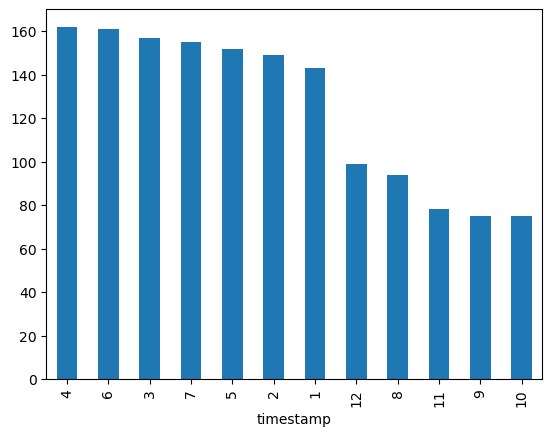

In [9]:
df["timestamp"].dt.month.value_counts().plot(kind="bar")

In [14]:
df["timestamp"].dt.second

0       46
1        3
2       54
3       31
4       33
        ..
1495    13
1496    45
1497    49
1498     1
1499    14
Name: timestamp, Length: 1500, dtype: int32

## Marca de Tiempo con Estilos Heterogéneos

SOLO CONVIERTE LOS VALORES CON EL FORMATO CORRECTO - SE DEBE PARSEAR PARA ORGANIZAR EL FORMATO

In [51]:
df["cambio1"] = pd.to_datetime(df["ts_str"], errors="coerce")
df["cambio1"]

0      2025-05-11 15:46:46
1                      NaT
2                      NaT
3      2024-04-18 09:10:31
4                      NaT
               ...        
1495                   NaT
1496                   NaT
1497                   NaT
1498                   NaT
1499                   NaT
Name: cambio1, Length: 1500, dtype: datetime64[ns]

In [49]:
df["ts_str"]

0        2025-05-11 15:46:46
1           2024/01/20 10:14
2           09/07/2024 05:06
3        2024-04-18 09:10:31
4        2025-06-09T14:35:33
                ...         
1495    05-Mar-2025 13:22:13
1496        01/12/2024 10:13
1497     2025-06-11T22:25:49
1498    28-May-2025 03:49:01
1499     2024-03-07T13:27:14
Name: ts_str, Length: 1500, dtype: object

In [52]:
from dateutil import parser

def try_parse(x):
    x = str(x).strip()
    for dayfirst in (True, False):
        try:
            return parser.parse(x, dayfirst=dayfirst, fuzzy=True)
        except Exception:
            continue
    return pd.NaT


df["ts_parsed"] = df["cambio1"].fillna(df["ts_str"].apply(try_parse))

df["ts_parsed"]

0      2025-05-11 15:46:46
1      2024-01-20 10:14:00
2      2024-07-09 05:06:00
3      2024-04-18 09:10:31
4      2025-09-06 14:35:33
               ...        
1495   2025-03-05 13:22:13
1496   2024-12-01 10:13:00
1497   2025-11-06 22:25:49
1498   2025-05-28 03:49:01
1499   2024-07-03 13:27:14
Name: ts_parsed, Length: 1500, dtype: datetime64[ns]

## Marca de Tiempo con ISO 8601 con zona horaria

In [44]:
df["ts_tz"]

0       2025-05-11T15:46:46-05:00
1       2024-01-20T10:14:03-05:00
2       2024-07-09T05:06:54-05:00
3       2024-04-18T09:10:31-05:00
4       2025-06-09T14:35:33-05:00
                  ...            
1495    2025-03-05T13:22:13-05:00
1496    2024-12-01T10:13:45-05:00
1497    2025-06-11T22:25:49-05:00
1498    2025-05-28T03:49:01-05:00
1499    2024-03-07T13:27:14-05:00
Name: ts_tz, Length: 1500, dtype: object

In [46]:
df["ts_tz"] = pd.to_datetime(df["ts_tz"])
df["ts_tz"]

0      2025-05-11 15:46:46-05:00
1      2024-01-20 10:14:03-05:00
2      2024-07-09 05:06:54-05:00
3      2024-04-18 09:10:31-05:00
4      2025-06-09 14:35:33-05:00
                  ...           
1495   2025-03-05 13:22:13-05:00
1496   2024-12-01 10:13:45-05:00
1497   2025-06-11 22:25:49-05:00
1498   2025-05-28 03:49:01-05:00
1499   2024-03-07 13:27:14-05:00
Name: ts_tz, Length: 1500, dtype: datetime64[ns, UTC-05:00]